# Fast Fourier Transform

Uses of FFT:
1. Solving partial differential equations
2. Denoising data
3. Analysis of data
4. Compression of audio and images

Discrete Fourier Transform Equation: $X_k=\sum^{n-1}_{m=0}x_me^{-i2\pi km/n}$

Inverse Discrete Fourier Transform Equation: $X_k=\frac{1}{n}\sum^{n-1}_{m=0}x_me^{i2\pi km/n}$

[Paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=5217220)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [3]:
def FFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N == 1:
        return x
    elif N % 2 > 0:
        raise ValueError("w")
    else:
        even = FFT(x[::2])
        odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([even + factor[:N//2] * odd, even + factor[N//2:] * odd])

In [4]:
x = np.random.random(1024)
np.allclose(FFT(x), np.fft.fft(x))

True

Create a simple signal with two frequencies as a function and then another function with some noise

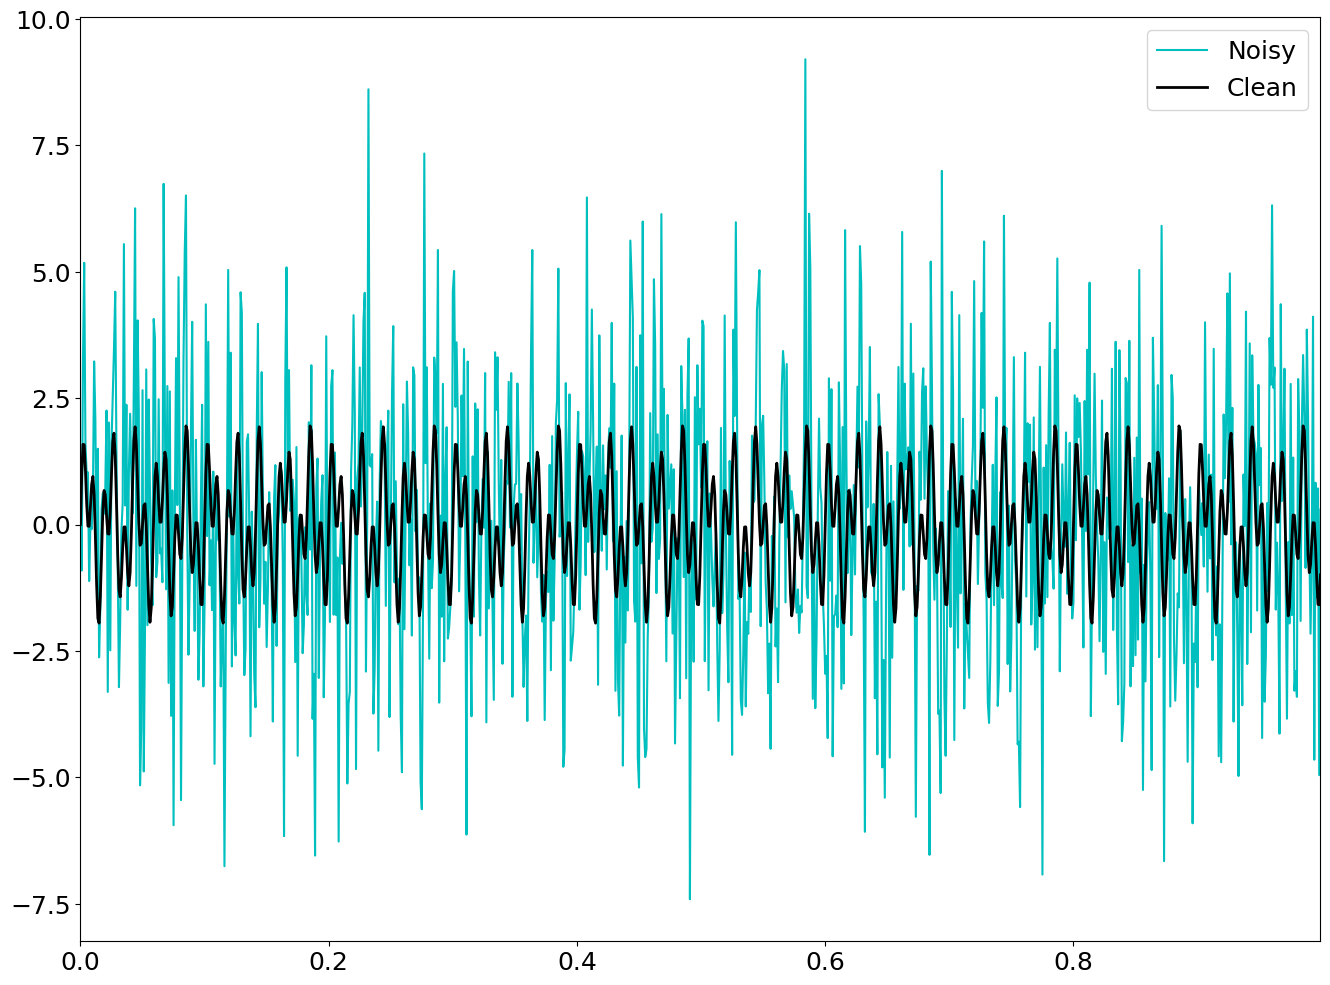

In [5]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

dt = 0.001
t = np.arange(0, 1, dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_clean = f
f = f + 2.5 * np.random.randn(len(t))

plt.plot(t, f, color='c', linewidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='k', linewidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.show()

Compute Fast Fourier Transform on noisy function

/Users/davidrobinson/Documents/GitHub/LearningPortfolio/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/davidrobinson/Documents/GitHub/LearningPortfolio/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


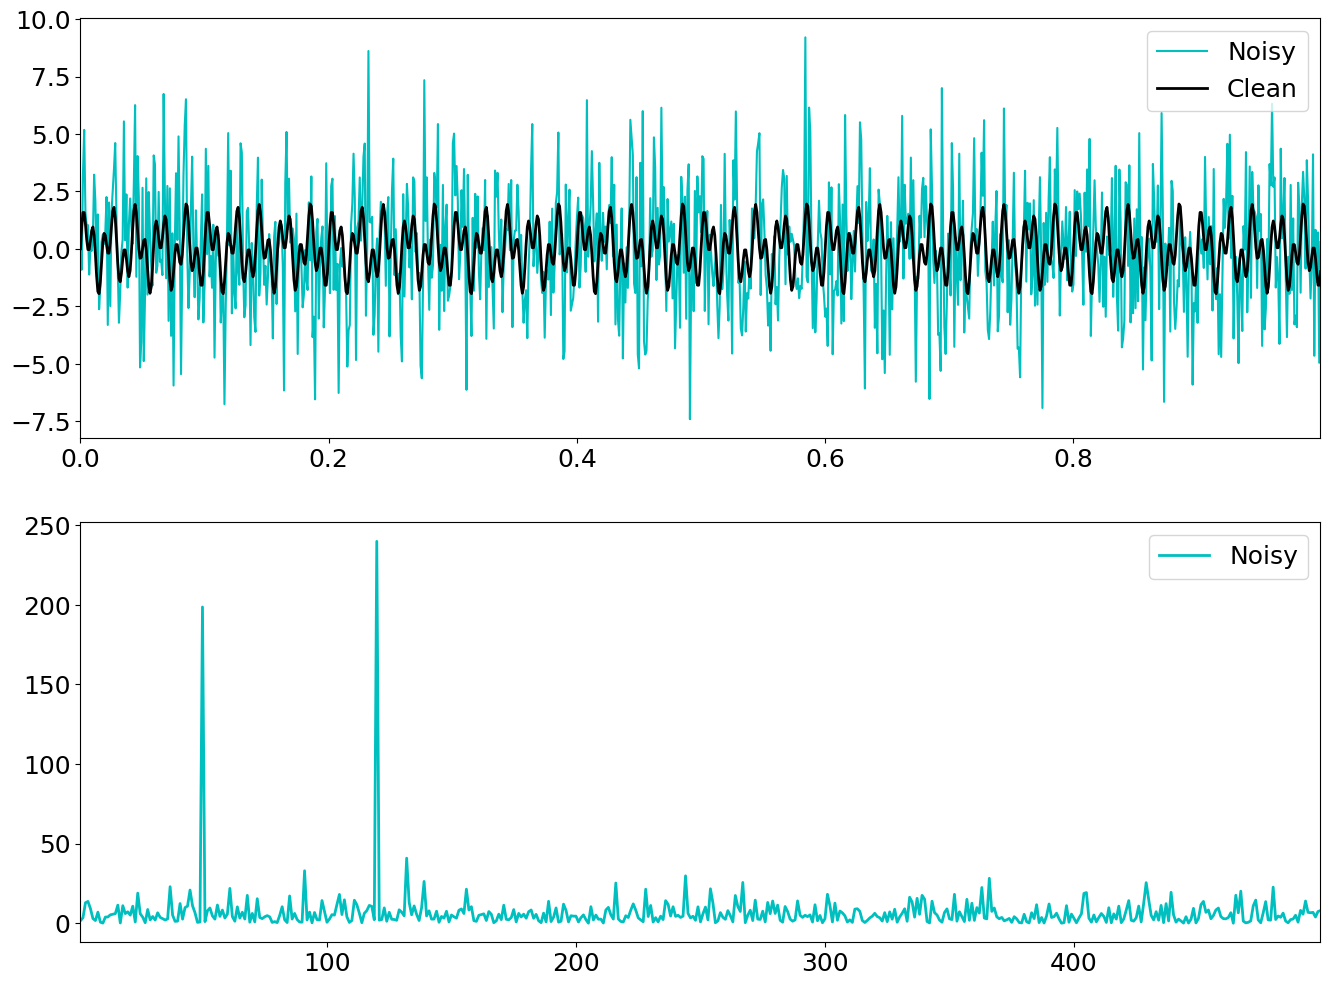

In [6]:
N = len(t)
fhat = np.fft.fft(f, N)
psd = fhat * np.conj(fhat) / N
freq = 1 / (dt * N) * np.arange(N)
l = np.arange(1, np.floor(N/2), dtype='int')

fig, axis = plt.subplots(2, 1)

plt.sca(axis[0])
plt.plot(t, f, color='c', linewidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='k', linewidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axis[1])
plt.plot(freq[l], psd[l], color='c', linewidth=2, label='Noisy')
plt.xlim(freq[l[0]], freq[l[-1]])
plt.legend()

plt.show()

Use Inverse Fast Fourier Transform to filter out noise

In [7]:
indices = psd > 100
psd_clean = psd * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

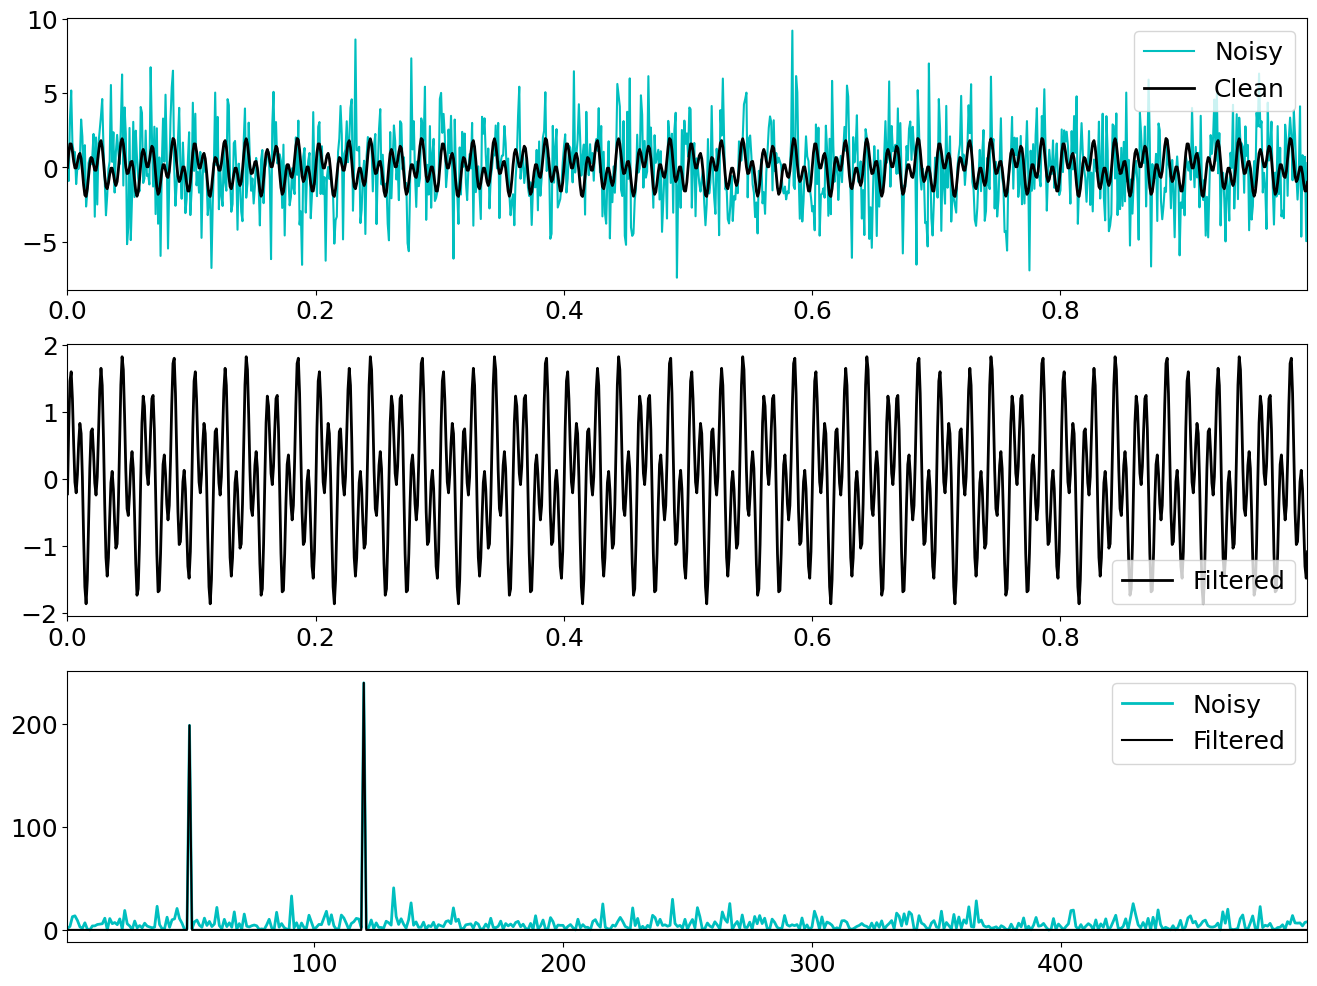

In [8]:
fig, axis = plt.subplots(3, 1)

plt.sca(axis[0])
plt.plot(t, f, color='c', linewidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='k', linewidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axis[1])
plt.plot(t, ffilt, color='k', linewidth=2, label='Filtered')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axis[2])
plt.plot(freq[l], psd[l], color='c', linewidth=2, label='Noisy')
plt.plot(freq[l], psd_clean[l], color='k', linewidth=1.5, label='Filtered')
plt.xlim(freq[l[0]], freq[l[-1]])
plt.legend()

plt.show()